# Natural Language Processing of the KJV Bible
+ Sentiment Analysis
+ EDA
+ Summarization
+ Prediction of Verse

#### Data Sources
+ https://raw.githubusercontent.com/scrollmapper/bible_databases/master/csv/t_kjv.csv

## Preprocessing of the KJV Bible

In [7]:
# Load EDA Pkgs
from typing import Tuple
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [8]:
# Load Dataset
df = pd.read_csv("t_kjv.csv", index_col=False)

In [9]:
# Columns
df.columns

Index(['id', 'b', 'c', 'v', 't'], dtype='object')

In [10]:
# Head
df.head()

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [11]:
# Rename Books
df1 = df

In [12]:
# Replacing with the correct name
df1.b.replace(
    {
        1: "Genesis",
        2: "Exodus",
        3: "Leviticus",
        4: "Numbers",
        5: "Deuteronomy",
        6: "Joshua",
        7: "Judges",
        8: "Ruth",
        9: "1 Samuel (1 Kings)",
        10: "2 Samuel (2 Kings)",
        11: "1 Kings (3 Kings)",
        12: "2 Kings (4 Kings)",
        13: "1 Chronicles",
        14: "2 Chronicles",
        15: "Ezra",
        16: "Nehemiah",
        17: "Esther",
        18: "Job",
        19: "Psalms",
        20: "Proverbs",
        21: "Ecclesiastes",
        22: "Song of Solomon (Canticles)",
        23: "Isaiah",
        24: "Jeremiah",
        25: "Lamentations",
        26: "Ezekiel",
        27: "Daniel",
        28: "Hosea",
        29: "Joel",
        30: "Amos",
        31: "Obadiah",
        32: "Jonah",
        33: "Micah",
        34: "Nahum",
        35: "Habakkuk",
        36: "Zephaniah",
        37: "Haggai",
        38: "Zechariah",
        39: "Malachi",
        40: "Matthew",
        41: "Mark",
        42: "Luke",
        43: "John",
        44: "Acts",
        45: "Romans",
        46: "1 Corinthians",
        47: "2 Corinthians",
        48: "Galatians",
        49: "Ephesians",
        50: "Philippians",
        51: "Colossians",
        52: "1 Thessalonians",
        53: "2 Thessalonians",
        54: "1 Timothy",
        55: "2 Timothy",
        56: "Titus",
        57: "Philemon",
        58: "Hebrews",
        59: "James",
        60: "1 Peter",
        61: "2 Peter",
        62: "1 John",
        63: "2 John",
        64: "3 John",
        65: "Jude",
        66: "Revelation",
    },
    inplace=True,
)

In [13]:
# Renaming Columns
df1.columns = ["id", "book", "chapter", "verse", "text"]

In [14]:
Genesis = df1[df1["book"] == "Genesis"]
Chapter1 = Genesis[Genesis["chapter"] == 1]
Chapter1

,id,book,chapter,verse,text
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."
5,1001006,Genesis,1,6,"And God said, Let there be a firmament in the ..."
6,1001007,Genesis,1,7,"And God made the firmament, and divided the wa..."
7,1001008,Genesis,1,8,And God called the firmament Heaven. And the e...
8,1001009,Genesis,1,9,"And God said, Let the waters under the heaven ..."
9,1001010,Genesis,1,10,And God called the dry land Earth; and the gat...


In [15]:
Chapter1[Chapter1["verse"] == 1]["book"].values[0]
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(Genesis)

           id     book  chapter  verse  \
0     1001001  Genesis        1      1   
1     1001002  Genesis        1      2   
2     1001003  Genesis        1      3   
3     1001004  Genesis        1      4   
4     1001005  Genesis        1      5   
5     1001006  Genesis        1      6   
6     1001007  Genesis        1      7   
7     1001008  Genesis        1      8   
8     1001009  Genesis        1      9   
9     1001010  Genesis        1     10   
10    1001011  Genesis        1     11   
11    1001012  Genesis        1     12   
12    1001013  Genesis        1     13   
13    1001014  Genesis        1     14   
14    1001015  Genesis        1     15   
15    1001016  Genesis        1     16   
16    1001017  Genesis        1     17   
17    1001018  Genesis        1     18   
18    1001019  Genesis        1     19   
19    1001020  Genesis        1     20   
20    1001021  Genesis        1     21   
21    1001022  Genesis        1     22   
22    1001023  Genesis        1   

## Introduction of `tf`, `idf`, and `tf-idf` functions

In [16]:
import re
import math


def get_tf_for_documents(documents, sortby="tf", skip_stopwords: bool = False):
    """Get the term frequency for each word in a list of documents.

    Parameters
    ----------
    verses : list
        A list of verses.
    sortby : str, optional
        The column to sort by, by default 'tf'. Can be chosen from ['word', 'tc', 'tf'].
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False.

    Returns
    -------
    pd.DataFrame
        A DataFrame with the term frequency for each word in the documents.
    """
    tf = pd.DataFrame(columns=["word", "tc", "tf"])

    if skip_stopwords:
        from nltk.corpus import stopwords

        stopwords_set = set(stopwords.words("english"))
    else:
        stopwords_set = set()

    # Get n_words
    n_words = 0
    for verse in documents:
        verse_words = re.findall(r"\w+", verse)
        n_words += len(verse_words)

    for verse in documents:
        verse_words = re.findall(r"\w+", verse)
        for word in verse_words:
            word = word.lower()
            if word not in tf["word"].values and word not in stopwords_set:
                row = {}
                row["word"] = [word]
                row["tf"] = [1 / n_words]
                row["tc"] = 1
                row_df = pd.DataFrame(row)
                tf = pd.concat([tf, row_df], ignore_index=True)
            else:
                tf.loc[tf.word.isin([word]), "tf"] += 1 / n_words
                tf.loc[tf.word.isin([word]), "tc"] += 1

    tf = tf.sort_values(by=sortby, ascending=False)
    tf = tf.reset_index(drop=True)
    return tf


def get_idf_for_documents(documents, sortby="idf", skip_stopwords: bool = False):
    """Get the inverse document frequency for each word in a list of documents.

    Parameters
    ----------
    documents : list
        A list of documents. A document is a string of text.
    sortby : str, optional
        The column to sort by, by default 'idf'. Can be chosen from ['word', 'dc', 'idf'].
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False.

    Returns
    -------
    pd.DataFrame
        A DataFrame with the inverse document frequency for each word in the documents.
    """
    idf = pd.DataFrame(columns=["word", "dc", "idf"])

    N_documents = len(documents)

    if skip_stopwords:
        from nltk.corpus import stopwords

        stopwords_set = set(stopwords.words("english"))
    else:
        stopwords_set = set()

    # Get all_verse_words
    all_verse_words = []
    for verse in documents:
        verse_words = re.findall(r"\w+", verse)
        for i in range(len(verse_words)):
            verse_words[i] = verse_words[i].lower()
        all_verse_words.append(set(verse_words))

    for verse in documents:
        verse_words = re.findall(r"\w+", verse)
        for word in verse_words:
            word = word.lower()
            if word not in idf["word"].values and word not in stopwords_set:
                row = {}
                row["word"] = [word]
                row["idf"] = math.log(
                    N_documents
                    / len(
                        [True for verse_words in all_verse_words if word in verse_words]
                    )
                )
                row["dc"] = len(
                    [True for verse_words in all_verse_words if word in verse_words]
                )
                row_df = pd.DataFrame(row)
                idf = pd.concat([idf, row_df], ignore_index=True)
    idf = idf.sort_values(by=sortby, ascending=False)
    idf = idf.reset_index(drop=True)
    return idf


def get_tf_idf_for_documents(documents, sort_by="tf", skip_stopwords: bool = False):
    """Get the tf-idf for each word in a list of documents.

    Parameters
    ----------
    documents : list
        A list of documents. A document is a string of text.
    sort_by : str, optional
        The column to sort by, by default 'tf'. Can be chosen from ['word', 'dc', 'idf', 'tf', 'tf_idf'].
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False.

    Returns
    -------
    pd.DataFrame
        A DataFrame with the tf-idf for each word in the documents.
    """

    tf = get_tf_for_documents(documents, sortby="word", skip_stopwords=skip_stopwords)
    tf = tf.reset_index(drop=True)
    idf = get_idf_for_documents(documents, sortby="word", skip_stopwords=skip_stopwords)
    idf = idf.reset_index(drop=True)

    idf_column = {"dc": idf["dc"].values, "idf": idf["idf"].values}
    idf_df = pd.DataFrame(idf_column)
    tf_idf = pd.concat([tf, idf_df], axis=1)

    tf_idf_column = {"tf_idf": tf["tf"].values * idf["idf"].values}
    tf_idf_df = pd.DataFrame(tf_idf_column)
    tf_idf = pd.concat([tf_idf, tf_idf_df], axis=1)

    tf_idf = tf_idf.sort_values(by=sort_by, ascending=False)
    return tf_idf

In [17]:
# testing out the functions, using verses of the first chapter as the documents.
verses = Chapter1["text"].values

tf = get_tf_for_documents(documents=verses, sortby="tf", skip_stopwords=True)
idf = get_idf_for_documents(documents=verses, sortby="idf", skip_stopwords=True)

tf_idf = get_tf_idf_for_documents(documents=verses, skip_stopwords=True)

## Using POS tagging

As we will start using `nltk.pos_tag` here we will state the meaning of all categories:

In [18]:
# Create a dictionary of POS tags
pos_tags_dict = {
    "CC": "Coordinating conjunction",
    "CD": "Cardinal number",
    "DT": "Determiner",
    "EX": "Existential there",
    "FW": "Foreign word",
    "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective",
    "JJR": "Adjective, comparative",
    "JJS": "Adjective, superlative",
    "LS": "List item marker",
    "MD": "Modal",
    "NN": "Noun, singular or mass",
    "NNS": "Noun, plural",
    "NNP": "Proper noun, singular",
    "NNPS": "Proper noun, plural",
    "PDT": "Predeterminer",
    "POS": "Possessive ending",
    "PRP": "Personal pronoun",
    "PRP$": "Possessive pronoun",
    "RB": "Adverb",
    "RBR": "Adverb, comparative",
    "RBS": "Adverb, superlative",
    "RP": "Particle",
    "SYM": "Symbol",
    "TO": "to",
    "UH": "Interjection",
    "VB": "Verb, base form",
    "VBD": "Verb, past tense",
    "VBG": "Verb, gerund or present participle",
    "VBN": "Verb, past participle",
    "VBP": "Verb, non-3rd person singular present",
    "VBZ": "Verb, 3rd person singular present",
    "WDT": "Wh-determiner",
    "WP": "Wh-pronoun",
    "WP$": "Possessive wh-pronoun",
    "WRB": "Wh-adverb",
}

In [19]:
import nltk


def categorize_words(verses, skip_stopwords: bool = False):
    """Categorize all words given in the list of verses.

    Parameters
    ----------
    verses : list
        A list of verses. A verse is a string of text.
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False.

    Returns
    -------
    dict
        A dictionary with the words as keys and a list of word type categores of that word as values.
    """

    if skip_stopwords:
        from nltk.corpus import stopwords

        stopwords_set = set(stopwords.words("english"))
    else:
        stopwords_set = set()

    nnp_set = set()

    word_types = {}

    # Get word_types
    for verse in verses:
        verse_tokenized = nltk.tokenize.word_tokenize(verse)

        verse_pos_tags = nltk.pos_tag(verse_tokenized)

        # print(verse_pos_tags)
        for word, tag in verse_pos_tags:
            if tag in ["NNP", "NP", "NNS", "NNPS", "NN"]:
                nnp_set.add(
                    (
                        word,
                        tag,
                    )
                )

        verse_ne = nltk.ne_chunk(verse_pos_tags, binary=False)

        for verse_word in verse_ne:
            if type(verse_word) == tuple:
                try:
                    verse_word[0].lower()
                except:
                    print(verse_word[0])
                if verse_word[0].lower() not in stopwords_set:
                    if verse_word[0].lower() not in word_types:
                        word_types[verse_word[0].lower()] = {verse_word[1]: 1}
                    else:
                        if verse_word[1] not in word_types[verse_word[0].lower()]:
                            word_types[verse_word[0].lower()][verse_word[1]] = 1
                        else:
                            word_types[verse_word[0].lower()][verse_word[1]] += 1
            else:
                label = verse_word.label()
                while verse_word:
                    verse_word_pop = verse_word.pop()
                    if verse_word_pop[0].lower() not in word_types:
                        word_types[verse_word_pop[0].lower()] = {
                            verse_word_pop[1]: 1,
                            label: 1,
                        }
                    else:
                        if (
                            verse_word_pop[1]
                            not in word_types[verse_word_pop[0].lower()]
                        ):
                            word_types[verse_word_pop[0].lower()][verse_word_pop[1]] = 1
                        else:
                            word_types[verse_word_pop[0].lower()][
                                verse_word_pop[1]
                            ] += 1
                        if label not in word_types[verse_word_pop[0].lower()]:
                            word_types[verse_word_pop[0].lower()][label] = 1
                        else:
                            word_types[verse_word_pop[0].lower()][label] += 1

    return word_types


def get_word_types_with_tf_idf(
    verses,
    sortby="tf",
    skip_stopwords=False,
    include_verbs=True,
    include_determiners=True,
    include_pronouns=True,
    include_adverbs=True,
    include_numbers=True,
):
    """Get a dataframe of words with their tf-idf scores and word types.

    Parameters
    ----------
    verses : list
        A list of verses. A verse is a string of text.
    sortby : str, optional
        Sort the dataframe by 'tf' or 'tf-idf', by default 'tf'
    skip_stopwords : bool, optional
        Whether to skip stopwords, by default False
    include_verbs : bool, optional
        Whether to include verbs, by default True
    include_determiners : bool, optional
        Whether to include determiners, by default True
    include_pronouns : bool, optional
        Whether to include pronouns, by default True

    Returns
    -------
    pd.DataFrame
        A dataframe with the words as index, tf-idf scores as columns, and word types as a column.
    """
    tf_idf = get_tf_idf_for_documents(
        verses, sort_by=sortby, skip_stopwords=skip_stopwords
    )
    tf_idf = tf_idf.reset_index(drop=True)

    word_types = categorize_words(verses, skip_stopwords=skip_stopwords)

    # Create a word_type column in tf_idf, if the word is not in word_types, then it is nan
    word_type_column = {
        "word_type": [
            word_types[word] if word in word_types else np.nan
            for word in tf_idf["word"].values
        ]
    }
    word_type_df = pd.DataFrame(word_type_column)
    tf_idf_word_types = pd.concat([tf_idf, word_type_df], axis=1)

    # Fileter out rows with nan word_type
    tf_idf_word_types = tf_idf_word_types[
        tf_idf_word_types["word_type"].apply(lambda x: not pd.isna(x))
    ]

    verb_set = (
        set(["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]) if not include_verbs else set()
    )
    determiner_set = set(["DT", "PDT", "WDT"]) if not include_determiners else set()
    pronouns_set = set(["PRP", "PRP$", "WP", "WP$"]) if not include_pronouns else set()
    adverbs_set = set(["RB", "RBR", "RBS", "WRB"]) if not include_adverbs else set()
    numbers_set = set(["CD"]) if not include_numbers else set()

    exclude_set = verb_set | determiner_set | pronouns_set | adverbs_set | numbers_set

    if exclude_set:
        print("Excluding words with the following word types: {}".format(exclude_set))
        # Exclude words if the frequency of the word type from exclude_set is 
        # greater than 10% of the total word types of that word
        tf_idf_word_types = tf_idf_word_types[
            tf_idf_word_types["word_type"].apply(
                lambda x: not (
                    sum([x[word_type] for word_type in x if word_type in exclude_set])
                    / sum(x.values())
                    > 0.1
                )
            )
        ]
        # Exclude words if the word type is in exclude_set (This is too STRICT)
        # tf_idf_word_types = tf_idf_word_types[
        #     tf_idf_word_types["word_type"].apply(
        #         lambda x: not exclude_set & set(x.keys())
        #     )
        # ]


    new_column_order = ["word", "word_type", "tc", "tf", "dc", "idf", "tf_idf"]
    tf_idf_word_types = tf_idf_word_types[new_column_order]

    tf_idf = tf_idf.reset_index(drop=True)

    return tf_idf_word_types


def get_n_top_words_of_a_dataframe(df, n=10, include_verbs=True):
    """Get the top 10 words of a dataframe.

    Parameters
    ----------
    df : pd.DataFrame
        A dataframe with the word, word_type, dc, idf, tf, and tf_idf columns.
    n : int, optional
        The number of words to return, by default 10.
    include_verbs : bool, optional
        Whether to include verbs, by default True.

    Returns
    -------
    list
        A list of the top 10 words.
    """
    best_n = []
    if include_verbs:
        chosen_types = {"NN", "NNS", "NNP", "PERSON", "VBD", "VB", "GPE"}
    else:
        chosen_types = {"NN", "NNS", "NNP", "PERSON", "GPE"}

    for index in range(len(df)):
        if len(best_n) == n:
            break
        elif set(df.loc[index, "word_type"].keys()) & chosen_types:
            best_n.append(df.loc[index, "word"])

    return best_n

In [20]:
# Testing the functions with the verses of the first chapter.
word_types = categorize_words(verses, skip_stopwords=True)
tf_idf_word_types = get_word_types_with_tf_idf(verses, sortby="tf", skip_stopwords=True)

get_n_top_words_of_a_dataframe(tf_idf_word_types)

['god',
 'earth',
 'let',
 'waters',
 'light',
 'said',
 'day',
 'kind',
 'firmament',
 'heaven']

In [21]:
# Getting the top 10 words for each chapter in some range.
for chapter_index in range(1, 2):
    Chapter = Genesis[Genesis["chapter"] == chapter_index]
    chapter_verses = Chapter["text"].values

    tf_idf_word_types_chapter = get_word_types_with_tf_idf(
        chapter_verses, skip_stopwords=True
    )

    print(
        f"Chapter {chapter_index}",
        get_n_top_words_of_a_dataframe(tf_idf_word_types_chapter, include_verbs=False),
    )

Chapter 1 ['god', 'earth', 'waters', 'light', 'day', 'kind', 'firmament', 'heaven', 'seed', 'morning']


In [22]:
# constructing a list with elements as all verses of chapters in some range (There's 50 chapters in Genesis).
all_chapter_verses = []
for chapter_index in range(1, 51):
    Chapter = Genesis[Genesis["chapter"] == chapter_index]
    chapter_verses = ""
    for verse in Chapter["text"].values:
        chapter_verses = chapter_verses + " " + verse
    all_chapter_verses.append(chapter_verses)
all_chapter_verses

# genesis_tf_idf = get_tf_idf_for_verses(all_chapter_verses, sort_by='tf', skip_stopwords=True)
genesis_tf_idf_word_type = get_word_types_with_tf_idf(
    all_chapter_verses,
    "tf_idf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=False,
)

# To show the dataframe in a nice way, uncomment the following line.
# genesis_tf_idf_word_type.style.set_properties(subset=['word_type'], **{'width': '400px'})

Excluding words with the following word types: {'VBN', 'WP', 'VBG', 'WP$', 'DT', 'RB', 'VBD', 'WRB', 'VB', 'RBR', 'RBS', 'VBZ', 'CD', 'WDT', 'PRP', 'PDT', 'VBP', 'PRP$'}


In [23]:
# Print the row of genesis_tf_idf_word_type with the word 'jacob'
for key, value in genesis_tf_idf_word_type[genesis_tf_idf_word_type["word"] == "lord"]['word_type'].values[0].items():
    print(f"{key}: {value}")

NNP: 169
ORGANIZATION: 164
PERSON: 4
NN: 41
VBN: 1


In [24]:
tf_sorted = genesis_tf_idf_word_type.head(30)

tf_sorted.style.set_properties(subset=["word_type"], **{"width": "400px"})

,word,word_type,tc,tf,dc,idf,tf_idf
0,joseph,"{'NNP': 157, 'PERSON': 146, 'GPE': 10}",157,0.004075,16,1.139434,0.004644
1,jacob,"{'NNP': 177, 'PERSON': 162, 'NN': 2, 'GPE': 11, 'JJ': 1, 'VB': 1}",181,0.004698,19,0.967584,0.004546
2,abraham,"{'NNP': 134, 'GPE': 32, 'PERSON': 94, 'ORGANIZATION': 1}",134,0.003478,17,1.078810,0.003752
3,pharaoh,"{'NNP': 88, 'PERSON': 61, 'NN': 3, 'GPE': 20, 'VB': 2, 'JJ': 1}",94,0.002440,11,1.514128,0.003695
4,esau,"{'NNP': 68, 'PERSON': 43, 'VB': 2, 'GPE': 15, 'VBD': 1, 'NN': 4, 'ORGANIZATION': 1, 'PDT': 1}",76,0.001973,8,1.832581,0.003615
6,duke,"{'JJ': 8, 'NN': 18, 'NNP': 5, 'PERSON': 5, 'CC': 1}",32,0.000831,1,3.912023,0.003250
7,abram,"{'NNP': 59, 'PERSON': 43, 'GPE': 6}",59,0.001532,7,1.966113,0.003011
8,master,{'NN': 30},30,0.000779,2,3.218876,0.002507
9,isaac,"{'NNP': 80, 'PERSON': 56, 'GPE': 11}",80,0.002077,15,1.203973,0.002500
10,sons,{'NNS': 146},146,0.003790,26,0.653926,0.002478


In [25]:
# Top 30 words of Genesis
top_30_words_of_Genesis = genesis_tf_idf_word_type.head(30)

top_30_words_of_Genesis = top_30_words_of_Genesis.sort_values(by="dc", ascending=False)

top_30_words_of_Genesis.style.set_properties(subset=["word_type"], **{"width": "400px"})

,word,word_type,tc,tf,dc,idf,tf_idf
33,god,"{'NNP': 233, 'PERSON': 128, 'ORGANIZATION': 26, 'GPE': 3}",233,0.006048,38,0.274437,0.001660
16,father,"{'NN': 200, 'RB': 1}",201,0.005218,33,0.415515,0.002168
25,son,"{'NN': 158, 'JJ': 2}",160,0.004153,32,0.446287,0.001854
10,sons,{'NNS': 146},146,0.003790,26,0.653926,0.002478
15,earth,"{'NN': 120, 'NNP': 1, 'GPE': 1}",121,0.003141,25,0.693147,0.002177
12,years,{'NNS': 113},113,0.002933,23,0.776529,0.002278
24,brother,"{'NN': 92, 'RBR': 1}",93,0.002414,23,0.776529,0.001875
23,brethren,"{'NNS': 33, 'NN': 45, 'VBN': 1, 'VBP': 1}",80,0.002077,20,0.916291,0.001903
1,jacob,"{'NNP': 177, 'PERSON': 162, 'NN': 2, 'GPE': 11, 'JJ': 1, 'VB': 1}",181,0.004698,19,0.967584,0.004546
2,abraham,"{'NNP': 134, 'GPE': 32, 'PERSON': 94, 'ORGANIZATION': 1}",134,0.003478,17,1.078810,0.003752


## Thinking about what's next

In [26]:
import string

# Let's first just simply see in which chapters the top 30 words are used in Genesis.
# So let's create a dataframe of chapters and which of the top 30 words are used in each chapter.

# First we create a list of the top 30 words.
top_30_words = genesis_tf_idf_word_type.head(30)["word"].values

# Then we create a list of the chapters.
chapters = [i for i in range(1, 51)]

# Then we create a list with the top 30 words that are in each chapter.
top_30_words_in_chapters = []

for chapter in chapters:
    Chapter = Genesis[Genesis["chapter"] == chapter]
    chapter_verses = Chapter["text"].values
    # Merge the chapter verses into one string.
    chapter_verses = " ".join(chapter_verses)
    # Separate the string into a list of words.
    chapter_words = chapter_verses.split()
    # Remove punctuation.
    chapter_words = [word.strip(string.punctuation) for word in chapter_words]
    # Make all words lowercase.
    chapter_words = [word.lower() for word in chapter_words]

    top_30_words_in_chapter = []
    for word in top_30_words:
        if word in chapter_words:
            top_30_words_in_chapter.append(word)
    top_30_words_in_chapters.append(top_30_words_in_chapter)

# Then we create a dataframe with the chapters and the top 30 words in each chapter.
top_30_words_in_chapters_df = pd.DataFrame(
    {"Chapter": chapters, "top_30_words_in_chapter": top_30_words_in_chapters}
)

top_30_words_in_chapters_df.style.set_properties(
    subset=["top_30_words_in_chapter"], **{"width": "400px"}
)

,Chapter,top_30_words_in_chapter
0,1,"['years', 'earth', 'waters', 'god']"
1,2,"['earth', 'father', 'god']"
2,3,['god']
3,4,"['earth', 'father', 'brother', 'son', 'god']"
4,5,"['sons', 'years', 'noah', 'daughters', 'son', 'god']"
5,6,"['sons', 'years', 'noah', 'earth', 'daughters', 'waters', 'ark', 'god']"
6,7,"['sons', 'years', 'noah', 'earth', 'waters', 'ark', 'god']"
7,8,"['sons', 'noah', 'earth', 'waters', 'ark', 'god']"
8,9,"['sons', 'years', 'noah', 'earth', 'father', 'waters', 'brethren', 'brother', 'son', 'ark', 'god']"
9,10,"['sons', 'noah', 'earth', 'father', 'brother']"


In [27]:
verses = []
for chapter in range(1, 51):
    Chapter = Genesis[Genesis["chapter"] == chapter]
    chapter_verses = Chapter["text"].values
    verses.extend(chapter_verses)

# Separate the verses into sentences.
sentences = []
for verse in verses:
    sentences.extend(nltk.sent_tokenize(verse))

# For each verse, create a list of words.
sentences_words = []
sentences_words_to_sentence = {}
for verse in sentences:
    sentence_words = verse.split()
    sentence_words = [word.strip(string.punctuation) for word in sentence_words]
    sentence_words = [word.lower() for word in sentence_words]
    # Choose only verses that contain at least one of the top 30 words.
    if any(word in sentence_words for word in top_30_words):
        sentences_words.append(sentence_words)
        sentences_words_to_sentence[" ".join(sentence_words)] = verse.lower()


## Spacy Dependency Parser

In [28]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [29]:
# Find number of sentence words that have at least 2 words from the top 30 words.
len([sentence_words for sentence_words in sentences_words if len(set(sentence_words) & set(top_30_words)) >= 2])

571

In [30]:
doc_1 = nlp(verses[49])
sents = [s for s in doc_1.sents]

# Iterate over all tokens of the sentence
print("")
for token in sents[0]:
    # If the token is a verb, print its children
    if token.pos_ == "VERB":
        subject_text = None
        obj = []
        # Find the subject and object of the verb
        for child in token.children:
            #print(child.text, child.dep_)
            
            if child.dep_ == "nsubj":
                subject_text = child
            if child.dep_ == "dobj":
                obj.append(child)
                for grandchild in child.children:
                    if grandchild.dep_ == "prep":
                        for great_grandchild in grandchild.children:
                            if great_grandchild.dep_ == "pobj":
                                obj.append(great_grandchild)
        print(f"{subject_text} {token} {obj}")
        
# visualize the dependency parse
from spacy import displacy

displacy.render(doc_1, style="dep", jupyter=True)

for token in sents[0]:
    if token.text == 'it':
        break


God formed [beast, field]
None brought [them]
None see []
he call [what, them]
Adam called [creature]
None living []


In [31]:
token.morph.get('Gender')

[]

In [32]:
# Print top 30 words from Bible
top_30_words
top_30_words_genders = [
    "Masc",
    "Masc",
    "Masc",
    "Masc",
    "Masc",
    "Masc",
    "Masc",
    "Masc",
    "Masc",
    "Masc",
    "Masc",
    "Neut",
    "Masc",
    "Fem",
    "Neut",
    "Masc",
    "Neut",
    "Fem",
    "Neut",
    "Masc",
    "Masc",
    "Masc",
    "Neut",
    "Fem",
    "Masc",
    "Neut",
    "Fem",
    "Neut",
    "Masc",
    "Masc",
]

# Create a top_30_gender_dictionary
top_30_gender_dictionary = dict(zip(top_30_words, top_30_words_genders))
for key, value in top_30_gender_dictionary.items():
    print(key, ":", value)

joseph : Masc
jacob : Masc
abraham : Masc
pharaoh : Masc
esau : Masc
duke : Masc
abram : Masc
master : Masc
isaac : Masc
sons : Masc
laban : Masc
years : Neut
noah : Masc
rachel : Fem
earth : Neut
father : Masc
egypt : Neut
daughters : Fem
waters : Neut
brethren : Masc
brother : Masc
son : Masc
lot : Neut
sarah : Fem
abimelech : Masc
dream : Neut
daughter : Fem
ark : Neut
god : Masc
king : Masc


## NLTK CoreNLP Dependency Parser

In [33]:
# from nltk.parse.corenlp import CoreNLPDependencyParser

# # Use the dependency parser to parse the sentence.
# dependency_parser = CoreNLPDependencyParser()

# verse = verses[189]
# # separate the verse by punctuation dot, comma and semicolon.




# result = dependency_parser.raw_parse(verses[189])
# dep = result.__next__()
# print(dep.to_conll(4))

# all_cases = [dep for _, dep, _ in dep.triples()]
# print(all_cases)

# # Find the first subject of the sentence.
# def find_subject_of_sentence(sentence):
#     dependency_parser = CoreNLPDependencyParser()
#     result = dependency_parser.raw_parse(sentence)
#     dep = result.__next__()
#     for governor, dep, dependent in dep.triples():
#         if dep == "nsubj":
#             return dependent[0]

In [34]:
# for governor, dep, dependent in dep.triples():
#         if dep == "nsubj":
#             print("subject: ", dependent[0])
#         if dep == "dobj":
#             print("direct object: ", dependent[0])
#         if dep == "obj":
#             print("obj: ", dependent[0])

In [80]:
# constructing a list with elements as all verses of chapters in some range (There's 50 chapters in Genesis).
last_chapter = 50
n=50

selected_chapter_verses = []
for chapter_index in range(1, last_chapter + 1):
    Chapter = Genesis[Genesis["chapter"] == chapter_index]
    chapter_verses = ""
    for verse in Chapter["text"].values:
        chapter_verses = chapter_verses + " " + verse
        if "the LORD" in verse and "the LORD God" not in verse:
            # replace "the LORD" with "God"
            verse = verse.replace("the LORD", "God") #TODO change?
    selected_chapter_verses.append(chapter_verses)

# genesis_tf_idf = get_tf_idf_for_verses(all_chapter_verses, sort_by='tf', skip_stopwords=True)
tf_idf_pre_filtering = get_word_types_with_tf_idf(
    selected_chapter_verses,
    "tf_idf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=False,
)

all_verses = []
for chapter_index in range(1, last_chapter + 1):
    Chapter = Genesis[Genesis["chapter"] == chapter_index]
    chapter_verses = []
    for verse in Chapter["text"].values:
        if "the LORD" in verse and "the LORD God" not in verse:
            # replace "the LORD" with "God"
            verse = verse.replace("the LORD", "God") #TODO change?
        chapter_verses.append(verse)
    all_verses.extend(chapter_verses)

tf_idf_pre_filtering.head(n)

Excluding words with the following word types: {'VBN', 'WP', 'VBG', 'WP$', 'DT', 'RB', 'VBD', 'WRB', 'VB', 'RBR', 'RBS', 'VBZ', 'CD', 'WDT', 'PRP', 'PDT', 'VBP', 'PRP$'}


,word,word_type,tc,tf,dc,idf,tf_idf
0,joseph,"{'NNP': 157, 'PERSON': 146, 'GPE': 10}",157,0.004075,16,1.139434,0.004644
1,jacob,"{'NNP': 177, 'PERSON': 162, 'NN': 2, 'GPE': 11...",181,0.004698,19,0.967584,0.004546
2,abraham,"{'NNP': 134, 'GPE': 32, 'PERSON': 94, 'ORGANIZ...",134,0.003478,17,1.078810,0.003752
3,pharaoh,"{'NNP': 88, 'PERSON': 61, 'NN': 3, 'GPE': 20, ...",94,0.002440,11,1.514128,0.003695
4,esau,"{'NNP': 68, 'PERSON': 43, 'VB': 2, 'GPE': 15, ...",76,0.001973,8,1.832581,0.003615
6,duke,"{'JJ': 8, 'NN': 18, 'NNP': 5, 'PERSON': 5, 'CC...",32,0.000831,1,3.912023,0.003250
7,abram,"{'NNP': 59, 'PERSON': 43, 'GPE': 6}",59,0.001532,7,1.966113,0.003011
8,master,{'NN': 30},30,0.000779,2,3.218876,0.002507
9,isaac,"{'NNP': 80, 'PERSON': 56, 'GPE': 11}",80,0.002077,15,1.203973,0.002500
10,sons,{'NNS': 146},146,0.003790,26,0.653926,0.002478


## Spacy Genesis Parsing

In [81]:
subjects = {}
objects = {}

directed_relations = set()


top_n_words = tf_idf_pre_filtering.head(n)["word"].values

subject_object_in_top_n_words = 0

noun_pos = ["NOUN", "PROPN"]

pronouns = ["i", "me", "my", "mine", "you", "your", "yours", "he", "him", "his", "she", "her", "hers", "it", "its", "we", "us", "our", "ours", "they", "them", "their", "theirs"]

for verse_idx, verse in enumerate(all_verses):

    doc = nlp(verse)
    doc_sents = [s for s in doc.sents]
    print("\n", len(doc_sents), " sentences in verse ", verse_idx)
    for sent in doc_sents:
        print("sentence: ", sent.text)
        print("ents: ", sent.ents)

        sentence_verbs = [token for token in sent if token.pos_ in ["VERB", "AUX"] and token.i]
        sentence_subjects_non_pronouns = [
            token for token in sent if token.dep_ in ["nsubj", "nsubjpass"] 
            and token.text.lower() not in pronouns 
            and token.text.lower() in top_30_words
        ]
        for root in sentence_verbs:
            conjunct_subject = None
            # If there is no subject in the sentence, check if there is a subject in a conjunct
            # and use that as the subject.
            if len([child for child in root.children if child.dep_ in ["nsubj", "nsubjpass"]]) == 0 \
            and len([child for child in root.children if child.dep_ in ["dobj", "pobj"]]) > 0:
                if root.dep_ == "conj":
                    root_head = root.head
                    for child in root_head.children:
                        if child.dep_ in ["nsubj", "nsubjpass"]:
                            conjunct_subject = child
                            break
                if conjunct_subject is None:
                    continue 
            # NOT USING, TOO STRONG, MAYBE USE LATER WITH NUMBER OF RELATIONS TODO
            # HMMMMM no, actually it seems fine. There was another bug...

            # Check that there is a subject and an object.
            if len([child for child in root.children if child.dep_ in ["nsubj", "nsubjpass"]]) == 0 \
            or len([child for child in root.children if child.dep_ in ["dobj", "pobj"]]) == 0:
                continue
            
            current_subject = None
            # Iterate over the verb children to find the subject.
            for child in root.children:
                if child.dep_ in ["nsubj", "nsubjpass"]:
                    print("subject: ", child.text)
                    if child.text in subjects:
                        subjects[child.text] += 1
                    else:
                        subjects[child.text] = 1
                    current_subject = child
        
            #If there is a conjunct subject, use that as the subject. NOT USING, SEE UP TODO
            if conjunct_subject is not None and current_subject is None:
                print("Using conjunct subject: ", conjunct_subject.text)
                current_subject = conjunct_subject
                subject_text = conjunct_subject.text

            # Check if subject is a pronoun.
            # If it is, replace with a non-pronoun subject
            # from the sentence.
            if current_subject.text.lower() in pronouns:
                child_gender = current_subject.morph.get('Gender')[0] if len(current_subject.morph.get('Gender'))>0 else "Neut"
                # Take the subjects from sentence_subjects_non_pronouns that occured before the pronoun
                # and order them opposite to the order of the sentence.
                filtered_subjects_for_pronoun = [
                    subject for subject in sentence_subjects_non_pronouns
                    if subject.i < current_subject.i
                ][::-1]
                if len([subject for subject in filtered_subjects_for_pronoun if child_gender==top_30_gender_dictionary[subject.text.lower()]]) > 0:
                    old_subject = current_subject
                    current_subject = [subject for subject in filtered_subjects_for_pronoun if child_gender==top_30_gender_dictionary[subject.text.lower()]][0]
                    print("subject", current_subject.text, "replaced with: ", old_subject.text)
            subject_text = current_subject.text

            for child in root.children:
                if child.dep_ in ["dative"]:
                    for grandchild in child.children:
                        if grandchild.dep_ in ["pobj"]:
                            print("indirect object: ", grandchild.text)
                            if grandchild.text in objects:
                                objects[grandchild.text] += 1
                            else:
                                objects[grandchild.text] = 1
                            if grandchild.text.lower() in top_n_words and subject_text.lower() in top_n_words and grandchild.text.lower() != subject_text.lower():
                            #if subject.pos_ in noun_pos and grandchild.pos_ in noun_pos:
                                #print((subject.lower(), grandchild.text.lower()))
                                directed_relations.add((subject_text.lower(), grandchild.text.lower()))
                            subject_object_in_top_n_words += int(grandchild.text.lower() in top_n_words and subject_text.lower() in top_n_words)

                if child.dep_ in ["prep"]:
                    for grandchild in child.children:
                        if grandchild.dep_ in ["pobj"]:
                            print("object: ", grandchild.text)
                            if grandchild.text in objects:
                                objects[grandchild.text] += 1
                            else:
                                objects[grandchild.text] = 1
                            if grandchild.text.lower() in top_n_words and subject_text.lower() in top_n_words and grandchild.text.lower() != subject_text.lower():
                            #if subject.pos_ in noun_pos and grandchild.pos_ in noun_pos:
                                #print((subject.lower(), grandchild.text.lower()))
                                directed_relations.add((subject_text.lower(), grandchild.text.lower()))
                            subject_object_in_top_n_words += int(grandchild.text.lower() in top_n_words and subject_text.lower() in top_n_words)

                if child.dep_ in ["dobj", "pobj"]:
                    print("object: ", child.text)
                    if child.text in objects:
                        objects[child.text] += 1
                    else:
                        objects[child.text] = 1
                    if child.text.lower() in top_n_words and subject_text.lower() in top_n_words and child.text.lower() != subject_text.lower():
                    #if subject.pos_ in noun_pos and child.pos_ in noun_pos: 
                        #print((subject.lower(), child.text.lower()))
                        directed_relations.add((subject_text.lower(), child.text.lower()))
                    subject_object_in_top_n_words += int(child.text.lower() in top_n_words and subject_text.lower() in top_n_words)

                    # Check if the object is in conjunction with another object.
                    for grandchild in child.children:
                        if grandchild.dep_ in ["conj"]:
                            #print("object: ", grandchild.text)
                            if grandchild.text in objects:
                                objects[grandchild.text] += 1
                            else:
                                objects[grandchild.text] = 1
                            if grandchild.text.lower() in top_n_words and subject_text.lower() in top_n_words and grandchild.text.lower() != subject_text.lower():
                            #if subject.pos_ in noun_pos and grandchild.pos_ in noun_pos: 
                                #print((subject.lower(), grandchild.text.lower()))
                                directed_relations.add((subject_text.lower(), grandchild.text.lower()))
                            subject_object_in_top_n_words += int(grandchild.text.lower() in top_n_words and subject_text.lower() in top_n_words)
                        
                        if grandchild.dep_ in ["prep"]:
                            for great_grandchild in grandchild.children:
                                if great_grandchild.dep_ in ["pobj"]:
                                    print("object: ", great_grandchild.text)
                                    if great_grandchild.text in objects:
                                        objects[great_grandchild.text] += 1
                                    else:
                                        objects[great_grandchild.text] = 1
                                    if great_grandchild.text.lower() in top_n_words and subject_text.lower() in top_n_words and great_grandchild.text.lower() != subject_text.lower():
                                    #if subject.pos_ in noun_pos and great_grandchild.pos_ in noun_pos: 
                                        #print((subject.lower(), great_grandchild.text.lower()))
                                        directed_relations.add((subject_text.lower(), great_grandchild.text.lower()))
                                    subject_object_in_top_n_words += int(great_grandchild.text.lower() in top_n_words and subject_text.lower() in top_n_words)
                

# Create a dataframe with columns words, was_subject, was_object.
subjects_df = pd.DataFrame(
    {"word": list(subjects.keys()), "was_subject": list(subjects.values())}
)
objects_df = pd.DataFrame(
    {"word": list(objects.keys()), "was_object": list(objects.values())}
)

# Merge the two dataframes.
subjects_objects_df = pd.merge(subjects_df, objects_df, on="word", how="outer")

# Fill NaN values with 0.
subjects_objects_df = subjects_objects_df.fillna(0)
print(subject_object_in_top_n_words, " of the subjects and objects were in the top 30 words.")


 1  sentences in verse  0
sentence:  In the beginning God created the heaven and the earth.
ents:  []
subject:  God
object:  beginning
object:  heaven

 2  sentences in verse  1
sentence:  And the earth was without form, and void; and darkness was upon the face of the deep.
ents:  []
sentence:  And the Spirit of God moved upon the face of the waters.
ents:  []

 1  sentences in verse  2
sentence:  And God said, Let there be light: and there was light.
ents:  []

 1  sentences in verse  3
sentence:  And God saw the light, that it was good: and God divided the light from the darkness.
ents:  []
subject:  God
object:  light
subject:  God
object:  light
object:  darkness

 2  sentences in verse  4
sentence:  And God called the light Day, and the darkness he called Night.
ents:  []
subject:  God
object:  Day
sentence:  And the evening and the morning were the first day.
ents:  [the first day]

 1  sentences in verse  5
sentence:  And God said, Let there be a firmament in the midst of the w

In [82]:
# Expand the direct relation by the rule of transitivity.
# If (a, b) and (b, c) are in the directed relations, then (a, c) is also in the directed relations.
def expand_directed_relations(directed_relations):
    """Expand the directed relations by the rule of transitivity.
    
    Expands the directed relations by the rule of transitivity. 
    If (a, b) and (b, c) are in the directed relations, then (a, c) is also in the directed relations.
    
    Args:
        directed_relations: A set of tuples of strings.
        
    Returns:
        The expanded directed relations.
    """
    expanded_directed_relations = directed_relations.copy()
    for (a, b) in directed_relations:
        for (b2, c) in directed_relations:
            if b == b2:
                expanded_directed_relations.add((a, c))
    return expanded_directed_relations

# Expand the directed relations.
expanded_directed_relations = expand_directed_relations(directed_relations) 

# NOT USING THIS, MAKES THE TOP WORD TOO STRONG TODO

In [83]:
relations = list(directed_relations)

first_words = list(set([relation[0] for relation in relations]))
# Order the first words with respect to number of times they appear as the first word
# in the directed relations.

number_of_relations = {}
for word in first_words:
    number_of_relations[word] = len([relation[0] for relation in relations if relation[0]==word]) 
# Weird that this is necessary... I cannot do it directly in lambda...

# Get tf_idf from the dataframe tf_idf_pre_filtering with columns words and tf_idf.
tf_idf_of_words = {}
for word in first_words:
    tf_idf_of_words[word] = tf_idf_pre_filtering[tf_idf_pre_filtering["word"]==word]["tf_idf"].values[0]
    

first_words.sort(key=lambda x: number_of_relations[x]*tf_idf_of_words[x], reverse=True)


# Order the relations with respect to the first words.
relations.sort(key=lambda x: first_words.index(x[0]), reverse=False)
relations

[('jacob', 'father'),
 ('jacob', 'daughter'),
 ('jacob', 'house'),
 ('jacob', 'rachel'),
 ('jacob', 'laban'),
 ('jacob', 'esau'),
 ('jacob', 'years'),
 ('jacob', 'pharaoh'),
 ('jacob', 'name'),
 ('jacob', 'wife'),
 ('jacob', 'daughters'),
 ('joseph', 'house'),
 ('joseph', 'egypt'),
 ('joseph', 'name'),
 ('joseph', 'pharaoh'),
 ('joseph', 'father'),
 ('joseph', 'cattle'),
 ('joseph', 'brethren'),
 ('joseph', 'dream'),
 ('joseph', 'servants'),
 ('joseph', 'money'),
 ('god', 'house'),
 ('god', 'noah'),
 ('god', 'sarah'),
 ('god', 'rachel'),
 ('god', 'sodom'),
 ('god', 'cain'),
 ('god', 'abimelech'),
 ('god', 'isaac'),
 ('god', 'son'),
 ('god', 'kind'),
 ('god', 'pharaoh'),
 ('god', 'servant'),
 ('god', 'name'),
 ('god', 'abram'),
 ('god', 'wife'),
 ('god', 'abraham'),
 ('god', 'earth'),
 ('god', 'cattle'),
 ('god', 'seed'),
 ('god', 'city'),
 ('god', 'father'),
 ('god', 'master'),
 ('god', 'covenant'),
 ('god', 'sons'),
 ('god', 'servants'),
 ('abraham', 'sons'),
 ('abraham', 'son'),
 ('a

## Ontological hierarchy construction

In [84]:
def check_for_cycles(lesser_word, higher_word, ontological_hierarchy):
    """Check if adding the word pair (lesser_word, higher_word) to the ontology
    would create a cycle."""
    while True:
        parent = find_parent(higher_word, ontological_hierarchy)
        if parent is None:
            return False
        if parent == lesser_word:
            return True
        higher_word = parent

def find_parent(word, ontological_hierarchy):
    """Find the parent of a word in the ontology."""
    for parent, children in ontological_hierarchy.items():
        if word in children:
            return parent
    return None

# Create ontological hierarchy from the directed relations:

ontological_hierarchy = {}

words_with_parents = set()
word_in_hierarchy = set()

for relation in relations:
    if relation[0]==relation[1]:
        continue
    if check_for_cycles(relation[1], relation[0], ontological_hierarchy):
        continue

    if relation[1] in words_with_parents:
        continue
    if relation[0] in ontological_hierarchy:
        ontological_hierarchy[relation[0]].append(relation[1])
        words_with_parents.add(relation[1])
    else:
        ontological_hierarchy[relation[0]] = [relation[1]]
        words_with_parents.add(relation[1])

# Order the ontology with respect to the number of children.
ontological_hierarchy = dict(sorted(ontological_hierarchy.items(), key=lambda item: len(item[1]), reverse=True))
ontological_hierarchy


{'god': ['noah',
  'sarah',
  'sodom',
  'cain',
  'abimelech',
  'isaac',
  'son',
  'kind',
  'servant',
  'abram',
  'abraham',
  'earth',
  'seed',
  'city',
  'master',
  'covenant',
  'sons'],
 'jacob': ['father',
  'daughter',
  'house',
  'rachel',
  'laban',
  'esau',
  'years',
  'pharaoh',
  'name',
  'wife',
  'daughters'],
 'joseph': ['egypt', 'cattle', 'brethren', 'dream', 'servants', 'money'],
 'isaac': ['rebekah', 'jacob'],
 'sons': ['israel'],
 'laban': ['leah'],
 'noah': ['ark'],
 'rachel': ['joseph'],
 'rebekah': ['brother'],
 'servant': ['camels']}

In [85]:
from anytree import Node, RenderTree

tree = {}

# create a node for each parent key and add it to the tree
for parent in ontological_hierarchy:
    if parent not in tree:
        tree[parent] = Node(parent)

# add children nodes for each child of a parent
for parent, children in ontological_hierarchy.items():
    for child in children:
        if child not in tree:
            tree[child] = Node(child)
        tree[child].parent = tree[parent]

parents = list(ontological_hierarchy.keys())

# find the root node
for parent in parents:
    if parent not in words_with_parents:
        root = parent
        # print the tree
        for pre, fill, node in RenderTree(tree[root]):
            print("%s%s" % (pre, node.name))

god
├── noah
│   └── ark
├── sarah
├── sodom
├── cain
├── abimelech
├── isaac
│   ├── rebekah
│   │   └── brother
│   └── jacob
│       ├── father
│       ├── daughter
│       ├── house
│       ├── rachel
│       │   └── joseph
│       │       ├── egypt
│       │       ├── cattle
│       │       ├── brethren
│       │       ├── dream
│       │       ├── servants
│       │       └── money
│       ├── laban
│       │   └── leah
│       ├── esau
│       ├── years
│       ├── pharaoh
│       ├── name
│       ├── wife
│       └── daughters
├── son
├── kind
├── servant
│   └── camels
├── abram
├── abraham
├── earth
├── seed
├── city
├── master
├── covenant
└── sons
    └── israel


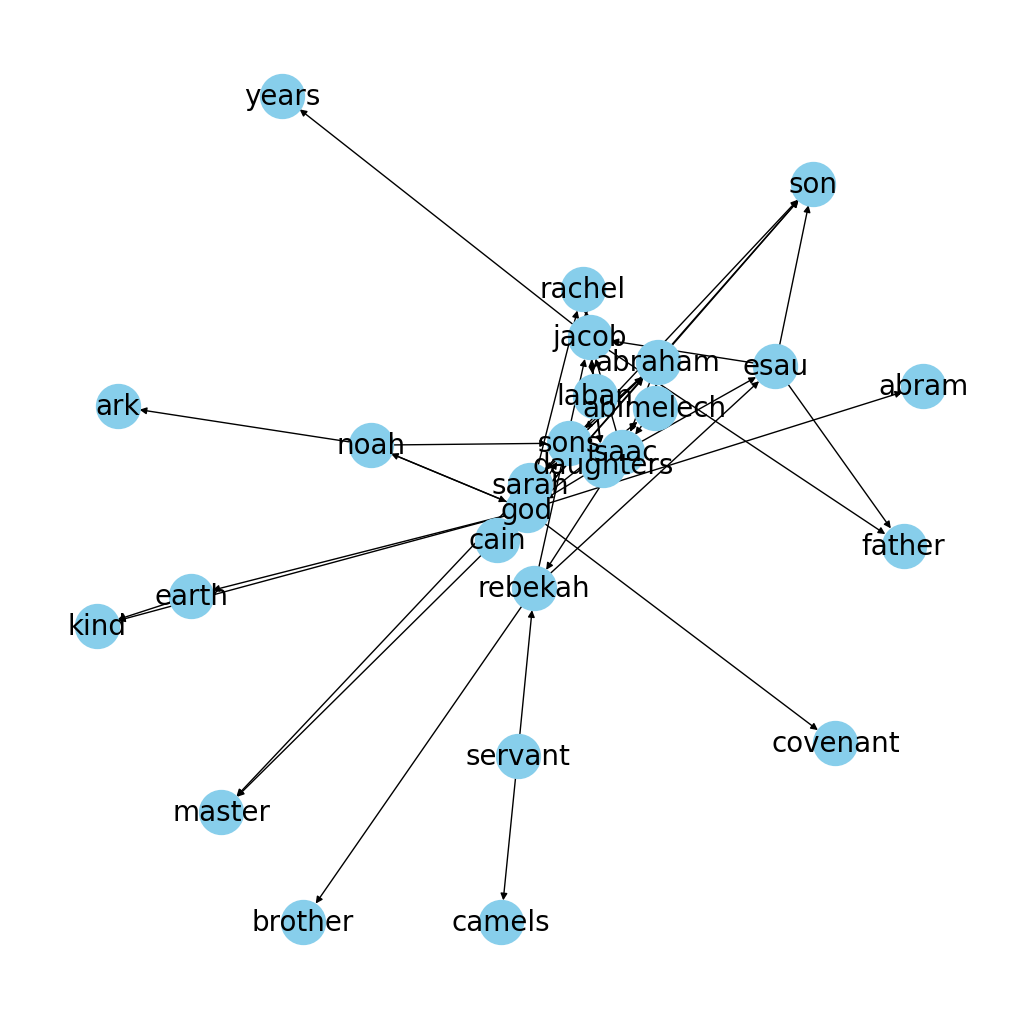

In [60]:
# Create a graph out of the directed relations.
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(directed_relations)

# Show the graph.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", font_size=20)

In [42]:
from itertools import permutations
def get_subject_objects(sent_):
    ### get subject, object entities by dependency tree parsing
    # sent_ = next(sents_doc.sents)
    root = sent_.root
    subject = None
    objs = []
    pairs = []
    for child in root.children:
        print(child.text, child.dep_)
        # print(child.dep_)
        if child.dep_ in ["nsubj", "nsubjpass"]:
            if (
                len(re.findall("[a-z]+", child.text.lower())) > 0
            ):  # filter out all numbers/symbols
                subject = child
                # print('Subject: ', child)
        elif child.dep_ in ["dobj", "attr", "prep", "ccomp"]:
            objs.append(child)
            # print('Object ', child)
    if (subject is not None) and (len(objs) > 0):
        for a, b in permutations([subject] + [obj for obj in objs], 2):
            a_ = [w for w in a.subtree]
            b_ = [w for w in b.subtree]
            pairs.append(
                (a_[0] if (len(a_) == 1) else a_, b_[0] if (len(b_) == 1) else b_)
            )

    return pairs